In [6]:
import pandas as pd
import numpy as np
import random
import sklearn

In [7]:
df = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Assignment_Solutions/master/Standard%20Metropolitan%20Areas%20Data%20-%20train_data%20-%20data.csv')
df.dtypes
df.describe()


,land_area,percent_city,percent_senior,physicians,hospital_beds,graduates,work_force,income,region,crime_rate
count,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000
mean,2615.727273,42.518182,9.781818,1828.333333,6345.868687,54.463636,449.366667,6762.505051,2.494949,55.643030
std,3045.826210,17.348277,2.524547,3192.199763,9136.202716,7.773286,610.990885,10393.349660,1.013921,13.470943
min,47.000000,13.400000,3.900000,140.000000,481.000000,30.300000,66.900000,769.000000,1.000000,23.320000
25%,1408.000000,30.100000,8.350000,459.000000,2390.000000,50.250000,150.300000,2003.000000,2.000000,46.115000
50%,1951.000000,39.500000,9.700000,774.000000,3472.000000,54.000000,257.200000,3510.000000,3.000000,56.060000
75%,2890.500000,52.600000,10.750000,1911.500000,6386.500000,58.300000,436.500000,6283.500000,3.000000,63.860000
max,27293.000000,100.000000,21.800000,25627.000000,69678.000000,72.800000,4083.900000,72100.000000,4.000000,85.620000


In [8]:
df

,land_area,percent_city,percent_senior,physicians,hospital_beds,graduates,work_force,income,region,crime_rate
0,1384,78.1,12.3,25627,69678,50.1,4083.9,72100,1,75.55
1,3719,43.9,9.4,13326,43292,53.9,3305.9,54542,2,56.03
2,3553,37.4,10.7,9724,33731,50.6,2066.3,33216,1,41.32
3,3916,29.9,8.8,6402,24167,52.2,1966.7,32906,2,67.38
4,2480,31.5,10.5,8502,16751,66.1,1514.5,26573,4,80.19
...,...,...,...,...,...,...,...,...,...,...
94,1511,38.7,10.7,348,1093,50.4,127.2,1452,4,70.66
95,1543,39.6,8.1,159,481,30.3,80.6,769,3,36.36
96,1011,37.8,10.5,264,964,70.7,93.2,1337,3,60.16
97,813,13.4,10.9,371,4355,58.0,97.0,1589,1,36.33


In [9]:
df.region.value_counts()

3    36
2    25
1    21
4    17
Name: region, dtype: int64

In [10]:
df.corr()

,land_area,percent_city,percent_senior,physicians,hospital_beds,graduates,work_force,income,region,crime_rate
land_area,1.000000,-0.077320,0.092226,0.085054,0.081034,0.088728,0.135792,0.111404,0.292392,0.293907
percent_city,-0.077320,1.000000,-0.250995,0.067391,0.052898,0.076720,0.016011,0.019235,0.235880,0.159596
percent_senior,0.092226,-0.250995,1.000000,0.056454,0.083775,-0.155695,0.035240,0.046073,-0.242811,-0.177992
physicians,0.085054,0.067391,0.056454,1.000000,0.974241,0.049500,0.965597,0.976209,-0.140961,0.187763
hospital_beds,0.081034,0.052898,0.083775,0.974241,1.000000,-0.003892,0.967913,0.974416,-0.220305,0.109799
graduates,0.088728,0.076720,-0.155695,0.049500,-0.003892,1.000000,0.044054,0.045578,0.246226,0.290880
work_force,0.135792,0.016011,0.035240,0.965597,0.967913,0.044054,1.000000,0.996735,-0.144022,0.175945
income,0.111404,0.019235,0.046073,0.976209,0.974416,0.045578,0.996735,1.000000,-0.152016,0.175797
region,0.292392,0.235880,-0.242811,-0.140961,-0.220305,0.246226,-0.144022,-0.152016,1.000000,0.636192
crime_rate,0.293907,0.159596,-0.177992,0.187763,0.109799,0.290880,0.175945,0.175797,0.636192,1.000000


In [11]:
df['land_area'][df['region'] == 4].head()

4      2480
13      782
14     4226
18    27293
20     9155
Name: land_area, dtype: int64

In [12]:
df['land_area'][df['region'] == 1][df['crime_rate'] >= 54.16].value_counts().sum()

4

In [13]:
df['land_area'][df['region'] == 3].value_counts().sum()

36

In [14]:
df['land_area'][df['land_area'] >= 5000].value_counts().sum()

8

In [15]:
df['land_area'][df['region'] == 4][df['crime_rate'] == 85.62].value_counts().sum()

1

In [16]:
df['land_area'][df['region'] == 4][df['crime_rate'] == 55.64].value_counts().sum()

0

<AxesSubplot:xlabel='land_area'>

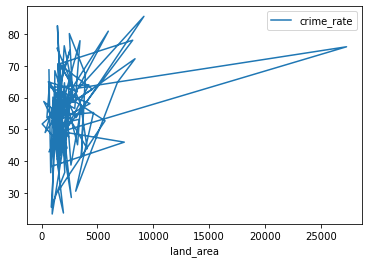

In [17]:
df.plot.line(x='land_area', y='crime_rate')

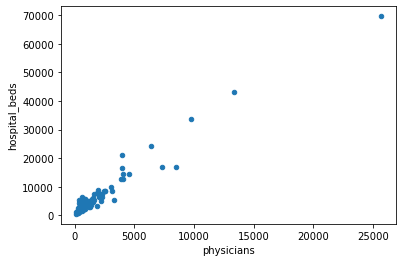

In [18]:
df.plot.scatter(x = 'physicians', y = 'hospital_beds', s = 20);

<AxesSubplot:xlabel='region_total'>

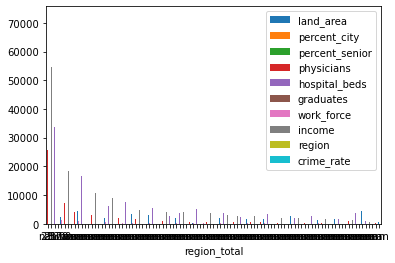

In [19]:
df['region_total'] = df.region.value_counts()
df.plot.bar(x='region_total', rot=0)

array([[<AxesSubplot:title={'center':'income'}>]], dtype=object)

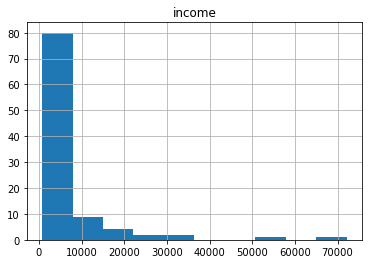

In [20]:
df.hist(column='income')